<br>

---

# 5 - Convolutional Neural Network

---
<br>

# Deep Computer Vision

* Obviously, machine learning is useful as well in computer vision. It provides a way for object detection, facial detection, and also image classification.


* As opposed to the Dense Neural Network we use earlier (Each node in the layer connects to all nodes in previous layer), computer vision usually uses __Convolutional Neural Network__.


* For basic explaination, if we use Dense Neural Networks for computer vision, the model will not only identify the pattern, but also the __location__ of the pattern as well! This is not preferred behavior in computer vision: __Dense Neural Networks identify patterns on global scale__


* As opposed to Dense Neural Networks, Convolutional Neural Networks __work locally__: It only identifies patterns, not its location. Therefore, say an image of a dog is flipped after training the model, it can still be identified alright!

---
<br>


* Remember that image datas usually comes in 3 dimensions: __(image width, image height, 3 color channels )__ **sometimes 4 for alpha*


* When predicting, the CNN looks for __features__, which is certain pixel patterns in a subspace of the image. This scanning for feature is done by a node called __filter__.


* A Convolutional Neural Network has 3 main attributes:
  * Input size 
  * Sample size for filters
  * Number of filters


* The output of filters is called as __feature maps__. It is usually smaller in size compared to input depending on the sample size of the filter.


* __Sample box__ is simply a subarea of the whole image. Say when we are processing image of size 10x10, we may have a sample box of size 3x3, which starts initially at position (0,0), then (1,0), then (2,0)...


* __Striding__ is simply how the sample box moves from one to another. Say Initially the sample box starts at 0 and ends at 3, and in the next step, the sample box starts at 1 and ends at 4, it is called stride of one.


* __Padding__ is a way to preserve the output size compared to input size. Depending on the sample size used, the output can be much smaller compared to the input. Padding is used to essentially 'pad' the output to make the output larger in size, so the next Convolutional layer could, perhaps detect patterns easily at the edges.


* __Polling__ is a method to reduce its dimensionality from the output map. From the sample box, it can simply reduce all the values in it into one single value, like:
  * Max
  * Min
  * Average


<br>

---

## 1.0 - Importing Modules

---
<br>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import numpy as np
import matplotlib.pyplot as plt

<br>

---

## 2.0 - Datasets

---
<br>

In this example, we will use the prebuilt dataset __Cifar10__, consisting of images from 10 classes.

In [2]:
# As usual, give meaningful class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog',
                'Horse', 'Ship', 'Truck']

In [3]:
# Load training and testing images as well as corresponding labels.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 199s 1us/step


In [18]:
# Somehow, the labels are 2d arrays with 1 column. Flatten into 1d array
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [20]:
print( type(train_images[0]) )     # Images are numpy arrays
print(train_images.shape)          # 50000 images, each sized (32, 32, 3) 

print(train_labels.shape)

<class 'numpy.ndarray'>
(50000, 32, 32, 3)
(50000,)


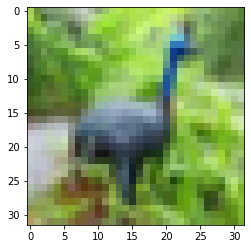

Bird


In [21]:
# Let's see some of the images
idx = 6

plt.figure()
plt.imshow(train_images[idx] )
plt.show()

print( class_names[ train_labels[idx] ] )

<br>

---

## 3.0 - CNN Architecture

---
<br>

One common architecture for a Convolutional Neural Network (CNN) is:
  * Stacks of __Conv2D__ layer, immediately followed by __MaxPooling2D__ layer. Repeat as needed
  * At the end, add a few __Densely connected layers__ for prediction of output
  
 <br>


The idea is, the stack of convolutional and polling layers will extract the features from the image. Then, the images are flattened and fed to densely connected layers to classify the image based on presence of features.

In [22]:
model = models.Sequential()     # In keras module

In [23]:
# Let's went ahead and put in 3 Conv2D layers, and 2 MaxPooling2D layer in between

# Convolutional Layer with 32 Filters, Sample box of (3x3), Rectified Linear Unit as Activation function
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3) ) )   
# Pooling function with size 2x2
model.add( layers.MaxPooling2D( (2,2) ) )
model.add( layers.Conv2D(64, (3,3), activation='relu') )
model.add( layers.MaxPooling2D( (2,2) ) )
model.add( layers.Conv2D(64, (3,3), activation='relu') )

In [24]:
# Let's get an overview of our convolutional layers
model.summary()

# Notice that the output shape keep decreasing. This is due to:
#   Convolutional layer - The sample size is 3x3, which causes 2 less row and column
#   Pooling - Sample size of 2x2 and stride of 2, will halve the output size

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Now let's add the last few Dense layers
model.add( layers.Flatten() )
model.add( layers.Dense(64, activation='relu') )    # Dense layer with 64 units, RELU activation
model.add( layers.Dense(10) )                       # Output layer - 10 Classes

In [26]:
# Final Summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

<br>

---

## 4.0 - Training our Model

---
<br>

In [27]:
# It's finally time to train the model! Compile the model, and fit() the model with those
# training data

model.compile(optimizer='adam',\
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),\
              metrics=['accuracy'])

In [28]:
history = model.fit( train_images, train_labels, epochs=10, validation_data=(test_images, test_labels) )

Epoch 1/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.6867 - accuracy: 0.4039 - val_loss: 1.3427 - val_accuracy: 0.5157
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3029 - accuracy: 0.5373 - val_loss: 1.2167 - val_accuracy: 0.5674
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1458 - accuracy: 0.6002 - val_loss: 1.1370 - val_accuracy: 0.5958
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.0419 - accuracy: 0.6355 - val_loss: 1.0377 - val_accuracy: 0.6366
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9619 - accuracy: 0.6618 - val_loss: 1.0558 - val_accuracy: 0.6394
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9004 - accuracy: 0.6849 - val_loss: 1.0470 - val_accuracy: 0.6379
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8429 - accuracy: 0.7069 - val_loss: 1.0433 -

<br>

---

## 5.0 - Testing our Model and Predicting Images

---
<br>

In [29]:
# Very same syntax as before, we can get the accuracy and loss etc, through evaluate()
test_loss, test_acc = model.evaluate( test_images, test_labels )

print( f'Loss: {test_loss}')
print( f'Accuracy: {test_acc}')

313/313 [==============================] - 2s 5ms/step - loss: 1.1039 - accuracy: 0.6543
Loss: 1.1039355993270874
Accuracy: 0.6542999744415283


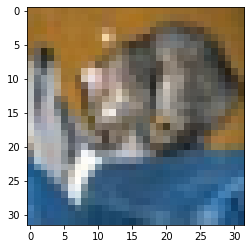

Predicted: Cat
Actual: Cat


In [30]:
idx = 0

plt.figure()
plt.imshow( test_images[idx] )
plt.show()

res = np.argmax( model( np.array( [ test_images[idx] ] ) )[0] )

print( f'Predicted: {class_names[res]}')
print( f'Actual: {class_names[ test_labels[idx] ] }')

<br>

---

## 6.0 - Improvement Techniques

---
<br>

The following section will talk about common techniques when creating a model but with limited datasets, and how to improve the accuracy of the model in general

<br>

---

### 6.1 - Data Augmentation

---
<br>

* If we have one image, can I make it into multiple images? Yes! Through data augmentation.


* Essentially, one image can become multiple different images through transformations like zooming, stretching, rotating, color changing etc.


* Say we have 10000 images only. Through using all 4 possible rotations alone, 10000 images can become 40000 images!

In [44]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# A Data generator object that transform images
datagen = ImageDataGenerator(
    rotation_range = 80,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [49]:
# Test it out with one of the image
# Reshape into array of images, each with size (32,32,3) <- Size of image
reshape_img = test_images[0]
reshape_img = image.img_to_array(reshape_img)
reshape_img = reshape_img.reshape( (1,) + reshape_img.shape )

i = 0

# If you want to save the image, simply apply parameters 'save_to_dir' and 'save_prefix', 'save_format'
for batch in datagen.flow(reshape_img):
  plt.figure(i)
  plt.imshow( image.img_to_array( batch[0] ) )
  i += 1
  if i >= 4: break

plt.show()

ImportError: Image transformations require SciPy. Install SciPy.

<br>

---

## 6.2 - Pretrained Models 

---
<br>


Instead of training our model from scratch, which takes time and doesn't really give us too high accuracy, we can choose to use pretrained models from elsewhere, which is already trained on millions of datas, and fine tune it to suit our needs.


When using pretrained models, we have no need to change the convolutional layers already because they are trained already to detect features. What we need to change however, is the last few densely connected layers which classify our image based on the detected features.

### Importing Datasets

In [52]:
import tensorflow_datasets as tfds


# 80% of the data is for training, 10% for validation, and 10% for testing
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling cats_vs_dogs-train.tfrecord...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to C:\Users\Acer\tensorflow_datasets\cats_vs_dogs\4.0.0. Subsequent calls will reuse this data.


In [53]:
# A function that is used to get labels
# int2str is a function that converts 0, 1 to Cat, Dog
get_label_name = metadata.features['label'].int2str   # 0 - Cat, 1 - Dog

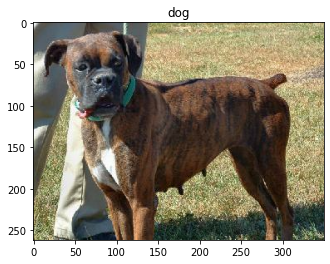

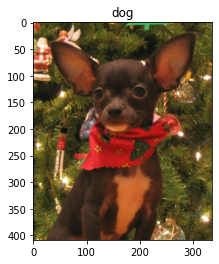

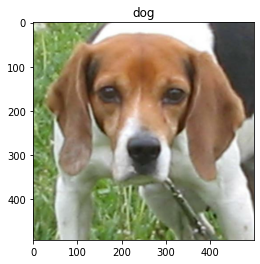

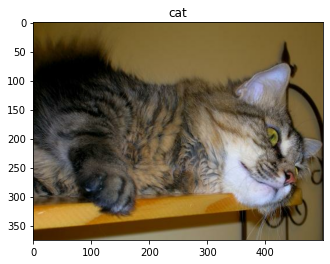

In [54]:
# Display some images from the dataset
for image, label in raw_train.take(4):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label) )

### Data Preprocessing


The images are not uniformly sized! Compress them to smaller size. In this case, 160x160

In [56]:
IMG_SIZE = 160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image / 127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE) )

  return image, label


train = raw_train.map( format_example )
validation = raw_validation.map( format_example )
test = raw_test.map( format_example )

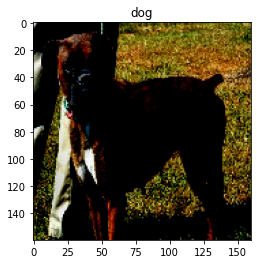

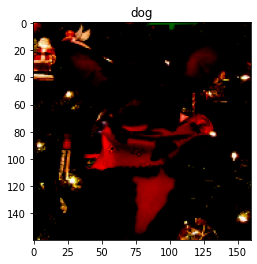

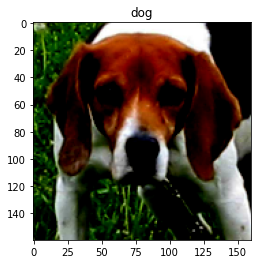

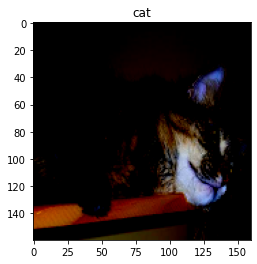

In [57]:
# Let's take a look at resized images

for im, label in train.take(4):
  plt.figure()
  plt.imshow(im)
  plt.title( get_label_name(label) )

In [ ]:
# Split the dataset into batches of 32
train_batches = train.batch(32)
validation_batches = validation.batch(32)
test_batches = test.batch(32)

### Picking a Pretrained Model
<br>

For this, we will be picking __MobileNet V2__ developed at Google, which is a classification model trained on 1.4 million images, having over 1000 different classes available

In [60]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Don't include the top layer, which is the classification layer. We don't want the 1000 classes!
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

9412608/9406464 [==============================] - 1s 0us/step


In [61]:
# Let's see how the MobileNet V2 convolutional neural network looks like:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [62]:
for image, _ in train_batches.take(1):
  pass

# Pass in one single image from our dataset. You see it outputs an array of shape (32, 5, 5, 1280)
feature_batch = base_model( image )
print(feature_batch.shape)          


# This means that the base model will output a shape tensor of shape (32, 5, 5, 1280) that
# is a feature extraction from the original image (1,160,160,3)
# 32 Means we'll have 32 layers of different filters / features

(32, 5, 5, 1280)


In [63]:
# Prevent the pretrained convolutional neural network from being trained again
# This is called Freezing the Base
base_model.trainable = False

### Adding our Own Classifier Layer

In [64]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),          # Pooling layer that uses Averaging
    tf.keras.layers.Dense(1)                           # 2 Classes only, so 1 output tensor is enough
])

In [65]:
# Look at the completed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


### Training the Model

In [66]:
# The learning rate determines how much we're allowed to change the weights and biases
# of the model. Use small learning rate because we are using a already pre trained model
base_learning_rate = 0.001

In [67]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [68]:
# To see difference before and after training, let's evaluate once before train
initial_epochs = 3
validation_steps = 20

loss_0, accuracy_0 = model.evaluate( validation_batches, steps = validation_steps)

20/20 [==============================] - 8s 315ms/step - loss: 0.8085 - accuracy: 0.4688


In [69]:
# Bad accuracy we have up there! Let's train the model now

history = model.fit( train_batches, epochs = initial_epochs, validation_data= validation_batches )

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 212s 361ms/step - loss: 0.0706 - accuracy: 0.9737 - val_loss: 0.0485 - val_accuracy: 0.9828
Epoch 2/3
582/582 [==============================] - 206s 354ms/step - loss: 0.0440 - accuracy: 0.9845 - val_loss: 0.0463 - val_accuracy: 0.9837
Epoch 3/3
582/582 [==============================] - 216s 370ms/step - loss: 0.0400 - accuracy: 0.9861 - val_loss: 0.0454 - val_accuracy: 0.9845
[0.9736700654029846, 0.9845244288444519, 0.9860827326774597]


### Saving The Model

Boy that takes a long time doesn't it? Perhaps we should save our model setup so that we don't have to retrain the model everytime we log off!

In [71]:
# Save the model as a .h5 file
model.save('trained_models/dogs_vs_cats.h5')

D:\My Desktop\Programming\Projects\MachineLearning\venv\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [72]:
new_model = tf.keras.models.load_model('trained_models/dogs_vs_cats.h5')

### Make Predictions

In [73]:
# Let's see whether the newly loaded model is same as the trained model
new_model.evaluate( validation_batches, steps=validation_steps )

20/20 [==============================] - 7s 339ms/step - loss: 0.0520 - accuracy: 0.9812


[0.05204176902770996, 0.981249988079071]

Enter image to test: 0 to 2325:1000


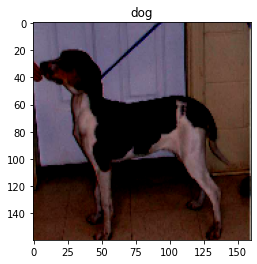

I predict this is a dog


In [74]:
# User inputs the ID of image
while True:
  id = input( f"Enter image to test: 0 to {len(test) - 1}:")

  if id.isdigit() and 0 <= int(id) < len(test):
    id = int(id)
    break
  print("Invalid ID input!")


# Skip ID images, take 1 next image, batch it for valid input to model
image = test.skip(id).take(1).batch(1)


# Get image for matplotlib, label name for correct answer
numpy_img = list( image.as_numpy_iterator() )[0][0][0]
label = get_label_name( list(image.as_numpy_iterator() )[0][1][0] )

# Drawing the image
plt.figure()
plt.imshow( numpy_img )
plt.title(label)
plt.show()

# Prediction
pred = new_model.predict( image )
pred_class = get_label_name( 1 if pred[0][0] > 0.5 else 0 )
print(f"I predict this is a { pred_class }")